# Creating & Optimizing Machine Learning Models

### First step was to merge the team's final cleaned datasets and merge them. Did further cleaning and prepping of the data to get it ready for the model.

In [1]:
import pandas as pd
import glob


In [2]:
# Read in files
df1 = pd.read_csv('../Census_demo/FinalCensusCsv/reduced_age_census.csv')
df1.head()

,state,median_age(years),year
0,Alabama,37,2008
1,Alaska,33,2008
2,Arizona,35,2008
3,Arkansas,37,2008
4,California,34,2008


In [3]:
df1.columns

Index(['state', 'median_age(years)', 'year'], dtype='object')

In [6]:
# Read in files
df2 = pd.read_csv('../CSV_Outputs/average_sentiment_by_party_all_years.csv')
df2

,Year,Candidate,Avg_Sentiment
0,2016,Democrat,0.364082
1,2016,Republican,0.403678
2,2020,Democrat,0.001620
3,2020,Republican,-0.002182
4,2024,Republican,0.451690
5,2024,Democrat,0.378815


In [4]:
# Read in files
df3 = pd.read_csv('../Economic Indicators/Economic_Election.csv')
df3

,state_country,candidate,total_votes,party,percent,election_year,economic_indicator,value
0,Alabama,"McCain, John",1266546.0,Republican,60.32,2008,Gross domestic product (GDP),174665
1,Alabama,"McCain, John",1266546.0,Republican,60.32,2008,Personal income,157780
2,Alabama,"McCain, John",1266546.0,Republican,60.32,2008,Total employment (number of jobs),2582600
3,Alabama,"Obama, Barack",813479.0,Democrat,38.74,2008,Gross domestic product (GDP),174665
4,Alabama,"Obama, Barack",813479.0,Democrat,38.74,2008,Personal income,157780
...,...,...,...,...,...,...,...,...
102244,United States,NaN,NaN,NaN,NaN,2016,Personal income,15884741
102245,United States,NaN,NaN,NaN,NaN,2016,Total employment (number of jobs),193425900
102246,United States,NaN,NaN,NaN,NaN,2020,Gross domestic product (GDP),21322950
102247,United States,NaN,NaN,NaN,NaN,2020,Personal income,19609985


In [6]:
# dropped unnecessary columns
df3_cleaned = df3.drop(columns=['candidate'])

In [7]:
# Remove rows where 'state' column value is "united states" since most values were NaN and it was not a necessary value
df3_updated = df3_cleaned[df3_cleaned['state_country'] != "United States"]


In [8]:
# Pivot the DataFrame to move the economic indicators to be features instead of values.
pivot_df = df3_updated.pivot_table(index=['state_country', 'total_votes', 'party', 'percent', 'election_year'],
                         columns='economic_indicator', values='value')

# Reset index if you want to flatten the DataFrame
pivot_df.reset_index(inplace=True)
pivot_df.head()

economic_indicator,state_country,total_votes,party,percent,election_year,Gross domestic product (GDP),Personal income,Total employment (number of jobs)
0,Alabama,795696.0,Democrat,38.36,2012,188280.0,172101.0,2503656.0
1,Alabama,813479.0,Democrat,38.74,2008,174665.0,157780.0,2582600.0
2,Alabama,1255925.0,Republican,60.55,2012,188280.0,172101.0,2503656.0
3,Alabama,1266546.0,Republican,60.32,2008,174665.0,157780.0,2582600.0
4,Alaska,122640.0,Democrat,40.81,2012,58320.0,38997.0,459282.0


In [3]:
# read in files
df4 = pd.read_csv('../Census_demo/FinalCensusCsv/merged_race_data2.csv')
df4.head()


,state,white,black_or_african_american,american_indian_and_alaska_native,asian,native_hawaiian_and_other_pacific-islander,hispanic_or_latino_any_race,year
0,Alabama,69.5,27.0,0.5,1.0,0.0,2.8,2008
1,Alaska,69.1,3.6,12.7,4.6,0.5,6.2,2008
2,Arizona,80.0,3.7,4.5,2.4,0.1,30.3,2008
3,Arkansas,78.4,16.0,0.5,1.0,0.1,5.3,2008
4,California,62.0,6.2,0.8,12.6,0.4,36.8,2008


In [10]:
# dropped more features to further reduce dataset size and as much as I wanted to feature them, the values were on average low enough to focus on the higher percentages that may affect the data more
df4_cleaned = df4.drop(columns=['american_indian_and_alaska_native','asian','native_hawaiian_and_other_pacific-islander'])
df4_cleaned.head()

,state,white,black_or_african_american,hispanic_or_latino_any_race,year
0,Alabama,69.5,27.0,2.8,2008
1,Alaska,69.1,3.6,6.2,2008
2,Arizona,80.0,3.7,30.3,2008
3,Arkansas,78.4,16.0,5.3,2008
4,California,62.0,6.2,36.8,2008


In [11]:
# Rename the 'election_year' column to 'Year' to help merge later
pivot_df.rename(columns={'election_year': 'Year'}, inplace=True)
pivot_df.rename(columns={'state_country': 'state'}, inplace=True)

# Display the DataFrame to confirm the change
pivot_df.head()



economic_indicator,state,total_votes,party,percent,Year,Gross domestic product (GDP),Personal income,Total employment (number of jobs)
0,Alabama,795696.0,Democrat,38.36,2012,188280.0,172101.0,2503656.0
1,Alabama,813479.0,Democrat,38.74,2008,174665.0,157780.0,2582600.0
2,Alabama,1255925.0,Republican,60.55,2012,188280.0,172101.0,2503656.0
3,Alabama,1266546.0,Republican,60.32,2008,174665.0,157780.0,2582600.0
4,Alaska,122640.0,Democrat,40.81,2012,58320.0,38997.0,459282.0


In [12]:
# Checked data types to prep for merge
pivot_df.dtypes

economic_indicator
state                                 object
total_votes                          float64
party                                 object
percent                              float64
Year                                   int64
Gross domestic product (GDP)         float64
Personal income                      float64
Total employment (number of jobs)    float64
dtype: object

In [13]:
# Merge DataFrames on the 'year' column with different column names
merged_df = pd.merge(df2, pivot_df, on='Year', how='outer')

# Display the first few rows of the merged DataFrame
merged_df.head(50)


,Year,Candidate,Avg_Sentiment,state,total_votes,party,percent,Gross domestic product (GDP),Personal income,Total employment (number of jobs)
0,2016,Democrat,0.364082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,Republican,0.403678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,Democrat,0.001620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,Republican,-0.002182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,Republican,0.451690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024,Democrat,0.378815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2012,NaN,NaN,Alabama,795696.0,Democrat,38.36,188280.0,172101.0,2503656.0
7,2012,NaN,NaN,Alabama,1255925.0,Republican,60.55,188280.0,172101.0,2503656.0
8,2012,NaN,NaN,Alaska,122640.0,Democrat,40.81,58320.0,38997.0,459282.0
9,2012,NaN,NaN,Alaska,164676.0,Republican,54.80,58320.0,38997.0,459282.0


In [14]:
merged_df.dtypes

Year                                   int64
Candidate                             object
Avg_Sentiment                        float64
state                                 object
total_votes                          float64
party                                 object
percent                              float64
Gross domestic product (GDP)         float64
Personal income                      float64
Total employment (number of jobs)    float64
dtype: object

In [15]:
# Drop the 'Candidate' column from the DataFrame
merged_df = merged_df.drop(columns=['Candidate'])

# Display the DataFrame to confirm the column has been dropped
merged_df.head()


,Year,Avg_Sentiment,state,total_votes,party,percent,Gross domestic product (GDP),Personal income,Total employment (number of jobs)
0,2016,0.364082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,0.403678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,0.001620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,-0.002182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,0.451690,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
merged_df.head(50)

,Year,Avg_Sentiment,state,total_votes,party,percent,Gross domestic product (GDP),Personal income,Total employment (number of jobs)
0,2016,0.364082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,0.403678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,0.001620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,-0.002182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,0.451690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024,0.378815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2012,NaN,Alabama,795696.0,Democrat,38.36,188280.0,172101.0,2503656.0
7,2012,NaN,Alabama,1255925.0,Republican,60.55,188280.0,172101.0,2503656.0
8,2012,NaN,Alaska,122640.0,Democrat,40.81,58320.0,38997.0,459282.0
9,2012,NaN,Alaska,164676.0,Republican,54.80,58320.0,38997.0,459282.0


In [17]:
df1.head(50)

,state,median_age(years),year
0,Alabama,37,2008
1,Alaska,33,2008
2,Arizona,35,2008
3,Arkansas,37,2008
4,California,34,2008
5,Colorado,35,2008
6,Connecticut,39,2008
7,Delaware,38,2008
8,District of Columbia,34,2008
9,Florida,40,2008


In [18]:
# Merge with df1 on 'state'
merged_with_df1 = pd.merge(merged_df, df1, on='state', how='outer')
merged_with_df1.head(50)

,Year,Avg_Sentiment,state,total_votes,party,percent,Gross domestic product (GDP),Personal income,Total employment (number of jobs),median_age(years),year
0,2016.0,0.364082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016.0,0.403678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.0,0.001620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,-0.002182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024.0,0.451690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024.0,0.378815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2012.0,NaN,Alabama,795696.0,Democrat,38.36,188280.0,172101.0,2503656.0,NaN,NaN
7,2012.0,NaN,Alabama,1255925.0,Republican,60.55,188280.0,172101.0,2503656.0,NaN,NaN
8,2008.0,NaN,Alabama,813479.0,Democrat,38.74,174665.0,157780.0,2582600.0,NaN,NaN
9,2008.0,NaN,Alabama,1266546.0,Republican,60.32,174665.0,157780.0,2582600.0,NaN,NaN


In [19]:
merged_with_df1.tail(50)

,Year,Avg_Sentiment,state,total_votes,party,percent,Gross domestic product (GDP),Personal income,Total employment (number of jobs),median_age(years),year
416,NaN,NaN,South Dakota,NaN,NaN,NaN,NaN,NaN,NaN,37.0,2008.0
417,NaN,NaN,South Dakota,NaN,NaN,NaN,NaN,NaN,NaN,36.0,2012.0
418,NaN,NaN,South Dakota,NaN,NaN,NaN,NaN,NaN,NaN,36.0,2016.0
419,NaN,NaN,South Dakota,NaN,NaN,NaN,NaN,NaN,NaN,37.0,2020.0
420,NaN,NaN,South Dakota,NaN,NaN,NaN,NaN,NaN,NaN,38.0,2022.0
421,NaN,NaN,Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,37.0,2008.0
422,NaN,NaN,Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,38.0,2012.0
423,NaN,NaN,Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,38.0,2016.0
424,NaN,NaN,Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,39.0,2020.0
425,NaN,NaN,Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,39.0,2022.0


In [20]:
# Merge with df4 on 'state'
final_merged_df = pd.merge(merged_with_df1, df4_cleaned, on='state', how='outer')

In [21]:
final_merged_df.head(50)

,Year,Avg_Sentiment,state,total_votes,party,percent,Gross domestic product (GDP),Personal income,Total employment (number of jobs),median_age(years),year_x,white,black_or_african_american,hispanic_or_latino_any_race,year_y
0,2016.0,0.364082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016.0,0.403678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.0,0.001620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,-0.002182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024.0,0.451690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024.0,0.378815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2012.0,NaN,Alabama,795696.0,Democrat,38.36,188280.0,172101.0,2503656.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2012.0,NaN,Alabama,1255925.0,Republican,60.55,188280.0,172101.0,2503656.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2008.0,NaN,Alabama,813479.0,Democrat,38.74,174665.0,157780.0,2582600.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2008.0,NaN,Alabama,1266546.0,Republican,60.32,174665.0,157780.0,2582600.0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Final merge and changed feature name of 'party' to 'winner' as that what the values represented
final_merged_df = final_merged_df.rename(columns={'party': 'winner'})

#  Change values in the 'winner' column so the model can better feed them in and interpret them
final_merged_df['winner'] = final_merged_df['winner'].map({'Democrat': 0, 'Republican': 1})

#  Move the 'winner' column to the end
# Reorder columns
final_merged_df = final_merged_df[[col for col in final_merged_df.columns if col != 'winner'] + ['winner']]

In [23]:
final_merged_df.head(50)

,Year,Avg_Sentiment,state,total_votes,percent,Gross domestic product (GDP),Personal income,Total employment (number of jobs),median_age(years),year_x,white,black_or_african_american,hispanic_or_latino_any_race,year_y,winner
0,2016.0,0.364082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016.0,0.403678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.0,0.001620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,-0.002182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024.0,0.451690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024.0,0.378815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2012.0,NaN,Alabama,795696.0,38.36,188280.0,172101.0,2503656.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,2012.0,NaN,Alabama,1255925.0,60.55,188280.0,172101.0,2503656.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,2008.0,NaN,Alabama,813479.0,38.74,174665.0,157780.0,2582600.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,2008.0,NaN,Alabama,1266546.0,60.32,174665.0,157780.0,2582600.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [24]:
final_merged_df.dtypes

Year                                 float64
Avg_Sentiment                        float64
state                                 object
total_votes                          float64
percent                              float64
Gross domestic product (GDP)         float64
Personal income                      float64
Total employment (number of jobs)    float64
median_age(years)                    float64
year_x                               float64
white                                float64
black_or_african_american            float64
hispanic_or_latino_any_race          float64
year_y                               float64
winner                               float64
dtype: object

In [25]:
# Drop 'year_x' and 'year_y' columns from the DataFrame
final_merged_df = final_merged_df.drop(columns=['year_x', 'year_y'])


In [26]:
final_merged_df.dtypes

Year                                 float64
Avg_Sentiment                        float64
state                                 object
total_votes                          float64
percent                              float64
Gross domestic product (GDP)         float64
Personal income                      float64
Total employment (number of jobs)    float64
median_age(years)                    float64
white                                float64
black_or_african_american            float64
hispanic_or_latino_any_race          float64
winner                               float64
dtype: object

In [27]:
# Fill NaN values with 'Unknown'
final_merged_df['state'] = final_merged_df['state'].fillna('Unknown')


In [28]:
# Perform encoding after handling NaN values
cat_df_encoded = pd.get_dummies(final_merged_df, columns=['state'])

In [29]:
# Impute NaN values with the median of each column
cat_df_encoded.fillna(cat_df_encoded.median(), inplace=True)


In [30]:
# Check for any NaN values
has_nan = cat_df_encoded.isna().any().any()
print("DataFrame contains NaN values:", has_nan)


DataFrame contains NaN values: False


In [31]:
# Shows rows with NaN values in any column
nan_rows = cat_df_encoded[cat_df_encoded.isna().any(axis=1)]
print(nan_rows)


Empty DataFrame
Columns: [Year, Avg_Sentiment, total_votes, percent, Gross domestic product (GDP), Personal income, Total employment (number of jobs), median_age(years), white, black_or_african_american, hispanic_or_latino_any_race, winner, state_ Alabama, state_ Alaska, state_ Arizona, state_ Arkansas, state_ California, state_ Colorado, state_ Connecticut, state_ Delaware, state_ District of Columbia, state_ Florida, state_ Georgia, state_ Hawaii, state_ Idaho, state_ Illinois, state_ Indiana, state_ Iowa, state_ Kansas, state_ Kentucky, state_ Louisiana, state_ Maine, state_ Maryland, state_ Massachusetts, state_ Michigan, state_ Minnesota, state_ Mississippi, state_ Missouri, state_ Montana, state_ Nebraska, state_ Nevada, state_ New Hampshire, state_ New Jersey, state_ New Mexico, state_ New York, state_ North Carolina, state_ North Dakota, state_ Ohio, state_ Oklahoma, state_ Oregon, state_ Pennsylvania, state_ Puerto Rico, state_ Rhode Island, state_ South Carolina, state_ South

In [33]:
# Checking for null values
has_nan = cat_df_encoded.isna().any().any()
print("DataFrame contains NaN values:", has_nan)

DataFrame contains NaN values: False


In [34]:
cat_df_encoded.head(50)

,Year,Avg_Sentiment,total_votes,percent,Gross domestic product (GDP),Personal income,Total employment (number of jobs),median_age(years),white,black_or_african_american,...,state_Tennessee,state_Texas,state_Unknown,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,2016.0,0.364082,878633.0,49.405,176865.5,158827.5,2395686.0,38.0,76.95,7.2,...,False,False,True,False,False,False,False,False,False,False
1,2016.0,0.403678,878633.0,49.405,176865.5,158827.5,2395686.0,38.0,76.95,7.2,...,False,False,True,False,False,False,False,False,False,False
2,2020.0,0.001620,878633.0,49.405,176865.5,158827.5,2395686.0,38.0,76.95,7.2,...,False,False,True,False,False,False,False,False,False,False
3,2020.0,-0.002182,878633.0,49.405,176865.5,158827.5,2395686.0,38.0,76.95,7.2,...,False,False,True,False,False,False,False,False,False,False
4,2024.0,0.451690,878633.0,49.405,176865.5,158827.5,2395686.0,38.0,76.95,7.2,...,False,False,True,False,False,False,False,False,False,False
5,2024.0,0.378815,878633.0,49.405,176865.5,158827.5,2395686.0,38.0,76.95,7.2,...,False,False,True,False,False,False,False,False,False,False
6,2012.0,0.371449,795696.0,38.360,188280.0,172101.0,2503656.0,38.0,76.95,7.2,...,False,False,False,False,False,False,False,False,False,False
7,2012.0,0.371449,1255925.0,60.550,188280.0,172101.0,2503656.0,38.0,76.95,7.2,...,False,False,False,False,False,False,False,False,False,False
8,2008.0,0.371449,813479.0,38.740,174665.0,157780.0,2582600.0,38.0,76.95,7.2,...,False,False,False,False,False,False,False,False,False,False
9,2008.0,0.371449,1266546.0,60.320,174665.0,157780.0,2582600.0,38.0,76.95,7.2,...,False,False,False,False,False,False,False,False,False,False


In [35]:
cat_df_encoded.columns

Index(['Year', 'Avg_Sentiment', 'total_votes', 'percent',
       'Gross domestic product (GDP)', 'Personal income',
       'Total employment (number of jobs)', 'median_age(years)', 'white',
       'black_or_african_american',
       ...
       'state_Tennessee', 'state_Texas', 'state_Unknown', 'state_Utah',
       'state_Vermont', 'state_Virginia', 'state_Washington',
       'state_West Virginia', 'state_Wisconsin', 'state_Wyoming'],
      dtype='object', length=116)

In [36]:
# Filling null values with either surrounding data or inplace value
cat_df_encoded.fillna(method='ffill', inplace=True)
cat_df_encoded.fillna(method='bfill', inplace=True)
cat_df_encoded.fillna(0, inplace=True)  


/var/folders/03/jr49d9l55y583dl7ztffjx1c0000gn/T/ipykernel_8685/2002642864.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cat_df_encoded.fillna(method='ffill', inplace=True)
/var/folders/03/jr49d9l55y583dl7ztffjx1c0000gn/T/ipykernel_8685/2002642864.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cat_df_encoded.fillna(method='bfill', inplace=True)


In [37]:
print(cat_df_encoded.isna().any().any())


False


In [38]:
# Export the cleaned DataFrame to a CSV file
cat_df_encoded.to_csv('prediction_final_df.csv', index=False)




## Creating the machine learing model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [48]:
# Define the years for training and testing sets
#train_years = [2008, 2012, 2016, 2020]
#test_years = [2022, 2024]

# Create training and testing DataFrames based on the year criteria
#train_df = cat_df_encoded[cat_df_encoded['Year'].isin(train_years)]
#test_df = cat_df_encoded[cat_df_encoded['Year'].isin(test_years)]

# Check columns to ensure proper split
#print("Training DataFrame columns:", train_df.columns)
#print("Testing DataFrame columns:", test_df.columns)

# Verify that the years used for training and testing are present in the DataFrame
train_years = [2008, 2012, 2016]
test_years = [2020, 2024]

# Check if these years exist in the DataFrame
years_in_df = cat_df_encoded['Year'].unique()
print(f"Years in DataFrame: {years_in_df}")

missing_train_years = [year for year in train_years if year not in years_in_df]
missing_test_years = [year for year in test_years if year not in years_in_df]

print(f"Missing training years: {missing_train_years}")
print(f"Missing testing years: {missing_test_years}")


Years in DataFrame: [2016. 2020. 2024. 2012. 2008.]
Missing training years: []
Missing testing years: []


In [52]:
# Create training and testing DataFrames
train_df = cat_df_encoded[cat_df_encoded['Year'].isin(train_years)]
test_df = cat_df_encoded[cat_df_encoded['Year'].isin(test_years)]

# Check the shape and sample data
print(f"Training DataFrame shape: {train_df.shape}")
print(f"Testing DataFrame shape: {test_df.shape}")

print("Sample of Training DataFrame:")
train_df.head()

print("Sample of Testing DataFrame:")
test_df.head()


Training DataFrame shape: (1242, 116)
Testing DataFrame shape: (4, 116)
Sample of Training DataFrame:
Sample of Testing DataFrame:


,Year,Avg_Sentiment,total_votes,percent,Gross domestic product (GDP),Personal income,Total employment (number of jobs),median_age(years),white,black_or_african_american,...,state_Tennessee,state_Texas,state_Unknown,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
2,2020.0,0.001620,878633.0,49.405,176865.5,158827.5,2395686.0,38.0,76.95,7.2,...,False,False,True,False,False,False,False,False,False,False
3,2020.0,-0.002182,878633.0,49.405,176865.5,158827.5,2395686.0,38.0,76.95,7.2,...,False,False,True,False,False,False,False,False,False,False
4,2024.0,0.451690,878633.0,49.405,176865.5,158827.5,2395686.0,38.0,76.95,7.2,...,False,False,True,False,False,False,False,False,False,False
5,2024.0,0.378815,878633.0,49.405,176865.5,158827.5,2395686.0,38.0,76.95,7.2,...,False,False,True,False,False,False,False,False,False,False


## Random Forest Model

In [55]:
# Separate Features (X) and Target (y)
X_train = train_df.drop(columns=['winner'])  # Features for training
y_train = train_df['winner']                # Target for training

X_test = test_df.drop(columns=['winner'])    # Features for testing
y_test = test_df['winner']                   # Target for testing

# Scaling the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## Decision Tree Model

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [57]:
# Separate features (X) and target (y) for both training and testing DataFrames
X_train = train_df.drop('winner', axis=1)
y_train = train_df['winner']

X_test = test_df.drop('winner', axis=1)
y_test = test_df['winner']


In [58]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [59]:
# Predict on the test data
y_pred = clf.predict(X_test)


In [60]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Generate classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")


Accuracy: 1.0
Confusion Matrix:
[[4]]
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



/opt/anaconda3/envs/dev_2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


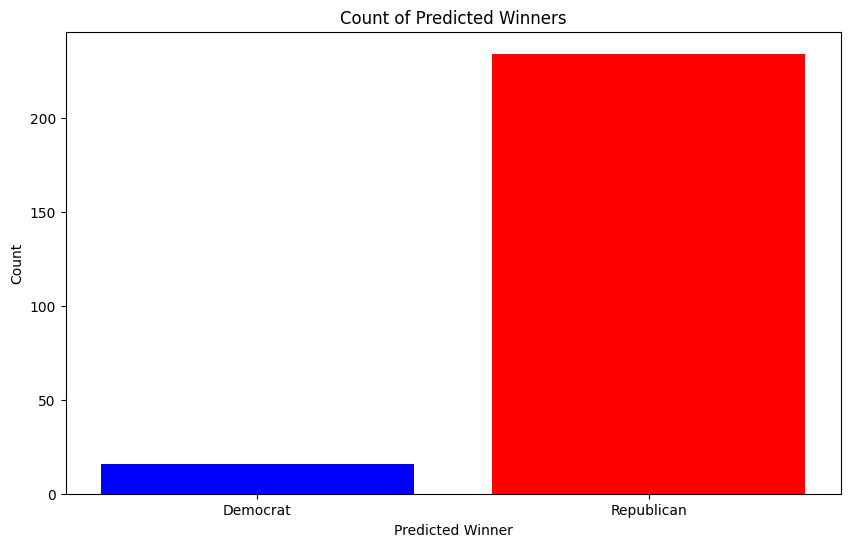

In [61]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Prepare Data
X = cat_df_encoded.drop('winner', axis=1)
y = cat_df_encoded['winner']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Add the predicted_winner column to the test DataFrame
test_df = X_test.copy()  
test_df['predicted_winner'] = y_pred

# Add the true winner column for counting purposes
test_df['true_winner'] = y_test

# Aggregate count of actual winners by predicted_winner
vote_summary = test_df.groupby('predicted_winner')['true_winner'].count().reset_index()
vote_summary.rename(columns={'true_winner': 'count'}, inplace=True)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(vote_summary['predicted_winner'].astype(str), vote_summary['count'], color=['blue', 'red'])
plt.xlabel('Predicted Winner')
plt.ylabel('Count')
plt.title('Count of Predicted Winners')
plt.xticks(ticks=[0, 1], labels=['Democrat', 'Republican'])
plt.show()


## Optimize Model

In [62]:
#Cross-Validation

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")


Cross-Validation Scores: [0.955      0.94974874 0.94974874 0.94472362 0.94472362]
Mean CV Accuracy: 0.9487889447236182


In [66]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.9497939698492462


In [65]:
# Use Ensemble Method 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize and train Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict with Random Forest
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Initialize and train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict with Gradient Boosting
y_pred_gb = gb_clf.predict(X_test)

# Calculate accuracy for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")



Random Forest Accuracy: 0.928
Gradient Boosting Accuracy: 0.96


## Create Random Forest Using PySpark

In [67]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("RandomForestExample") \
    .getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/12 15:48:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [68]:
# Convert Pandas DataFrame to PySpark DataFrame
spark_df = spark.createDataFrame(cat_df_encoded)

# Show the PySpark DataFrame
spark_df.show(1)


24/09/12 15:48:33 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
/opt/anaconda3/envs/dev_2/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:485: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:
24/09/12 15:48:40 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+------+------------------+-----------+-------+----------------------------+---------------+---------------------------------+-----------------+-----+-------------------------+---------------------------+------+--------------+-------------+--------------+---------------+-----------------+---------------+------------------+---------------+---------------------------+--------------+--------------+-------------+------------+---------------+--------------+-----------+-------------+---------------+----------------+------------+---------------+--------------------+---------------+----------------+------------------+---------------+--------------+---------------+-------------+--------------------+-----------------+-----------------+---------------+---------------------+-------------------+-----------+---------------+-------------+-------------------+------------------+-------------------+---------------------+-------------------+----------------+------------+-----------+--------------+-------

In [70]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("RandomForestExample").getOrCreate()

# Training DataFrame: years 2008, 2012, 2016
train_df = spark_df[spark_df['Year'].isin([2008, 2012, 2016])]

# Testing DataFrame: years 2022 and 2024
test_df = spark_df[spark_df['Year'].isin([2020, 2024])]



# Define feature columns
feature_columns = ["Avg_Sentiment", "total_votes", "percent", 
                   "Gross domestic product (GDP)", "Personal income",
                   "Total employment (number of jobs)", "median_age(years)",
                   "white", "black_or_african_american", "hispanic_or_latino_any_race"]

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

train_df = assembler.transform(train_df)
test_df = assembler.transform(test_df)

# Initialize and train the model
rf = RandomForestClassifier(labelCol="winner", featuresCol="features")
model = rf.fit(train_df)

# Make predictions
predictions = model.transform(test_df)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="winner", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy}")


Accuracy: 1.0
